In [1]:
!pip install langchain==0.1.20 langchain-core==0.1.52 langchain-google-genai google-generativeai --upgrade

# 1. Force the uninstall of the current, faulty version
!pip uninstall qdrant-client -y

# 2. Install the latest stable version
!pip install qdrant-client --upgrade

  Using cached langchain_google_genai-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached google_ai_generativelanguage-0.9.0-py3-none-any.whl.metadata (10 kB)
INFO: pip is looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_google_genai-3.0.3-py3-none-any.whl.metadata (2.7 kB)
  Using cached langchain_google_genai-3.0.2-py3-none-any.whl.metadata (2.7 kB)
  Using cached langchain_google_genai-3.0.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached langchain_google_genai-3.0.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached langchain_google_genai-2.1.12-py3-none-any.whl.metadata (7.1 kB)
  Using cached langchain_google_genai-2.1.11-py3-none-any.whl.metadata (6.7 kB)
  Using cached langchain_google_genai-2.1.10-py3-none-any.whl.metadata (7.2 kB)
  Using cached google_ai_generativelanguage-0.6.18-py

In [2]:
!pip install  pillow sentence-transformers transformers

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI


# New Financial Dataset with RAG Models for Efficient Image Summary



## Part 1: Insertion of Captions and Image Embeddings in Vector DB

This part of the notebook focuses on setting up the environment, cloning the dataset, and populating a Qdrant vector database with image and text embeddings.

**Steps:**

1. .**Install Libraries**: Install the required Python libraries.
2.  **Clone Dataset Repository**: Clone the `Financial360_dataset` GitHub repository containing the dataset.
    *   **How to run**: Execute the code cell with the `!git clone` command.
    *   **Expected Input**: None.
    *   **Expected Output**: Output showing the cloning process and confirmation of successful cloning.
3.  **Change Directory**: Navigate into the cloned repository's directory.
    *   **How to run**: Execute the code cell with the `%cd` command.
    *   **Expected Input**: None.
    *   **Expected Output**: Output showing the current working directory has changed.
4.  **Install Libraries**: Install the required Python libraries (`langchain`, `langchain-core`, `langchain-google-genai`, `google-generativeai`, `qdrant-client`, `pillow`, `sentence-transformers`, `transformers`).
    *   **How to run**: Execute the code cells with the `!pip install` commands.
    *   **Expected Input**: None.
    *   **Expected Output**: Output showing the installation progress and confirmation of successful installation.
5.  **Import Libraries**: Import the necessary Python libraries for working with images, embeddings, and Qdrant.
    *   **How to run**: Execute the code cell with the import statements.
    *   **Expected Input**: None.
    *   **Expected Output**: None (successful execution means the libraries are imported).
6.  **Load Embedding Models**: Load the CLIP model for image embeddings and the BGE-M3 model for text embeddings. Print their dimensions.
    *   **How to run**: Execute the code cell that loads the models and prints dimensions.
    *   **Expected Input**: None.
    *   **Expected Output**: Information about the loaded models and their embedding dimensions (e.g., "Image dim: 512 Text dim: 1024").
7.  **Define Embedding Functions**: Define Python functions to generate image and text embeddings using the loaded models.
    *   **How to run**: Execute the code cell containing the `get_image_embedding` and `get_text_embedding` functions.
    *   **Expected Input**: None.
    *   **Expected Output**: None (successful execution defines the functions).
8.  **Insert Embeddings into Vector DB**: Connect to Qdrant, create a collection, generate embeddings for images and their corresponding captions from the dataset, and insert them as points into the Qdrant collection.
    *   **How to run**: Execute the code cell that initializes the Qdrant client, creates/connects to the collection, and iterates through the dataset to generate and insert points.
    *   **Expected Input**: The script expects the dataset to be in the `/content/Financial360_dataset/financial_charts-dataset` directory.
    *   **Expected Output**: Messages indicating the number of points inserted, and information about the Qdrant collection.

## Part 2: Querying Based on Image Search or Text Search and RAG Implementation

This part of the notebook demonstrates how to query the populated Qdrant vector database using either an image or a text query, retrieve similar results, and use these results in a Retrieval-Augmented Generation (RAG) flow with a large language model.

**Steps:**

1.  **Perform Similarity Search (Image or Text)**: Generate an embedding for a query (either an image path or a text string) and use it to search for similar points in the Qdrant database. Display the results, including the score, image path, and summary, and visualize the retrieved images.
    *   **How to run**: Execute the code cell that defines a query (image path or text) and uses `client.query_points` to search.
    *   **Expected Input**: An image path or a text string for the query.
    *   **Expected Output**: Printed results showing the score, image path, and summary for the top similar results. The retrieved images should also be displayed.
2.  **Define and Use Unified RAG Function**: Define a function (`rag_query`) that takes either a text query or an image path, performs the Qdrant search, constructs a prompt with the retrieved context, and calls the LLM to generate an answer. Execute this function with example queries and display the results, including the retrieved images and the LLM's answer.
    *   **How to run**: Execute the code cell containing the `rag_query` function definition and the example calls.
    *   **Expected Input**: Either `user_input` (text) or `image_path` (image) for the `rag_query` function.
    *   **Expected Output**: Printed "Retrieved Documents" with summaries and displayed images for the top results, followed by the "LLM Answer" based on the retrieved context.

## Part 3: Evaluation of RAG Model Performance (Its part of MTP3)

This section details the evaluation of the RAG model's summarization capabilities against a ground truth dataset using various natural language processing metrics.

**Steps:**

1.  **Install Evaluation Libraries**: Install `rouge_score` for ROUGE metric calculation.
    *   **How to run**: Execute the code cell with `!pip install rouge_score`.
    *   **Expected Input**: None.
    *   **Expected Output**: Confirmation of successful installation.
2.  **Import Evaluation Libraries and Download NLTK Resources**: Import necessary libraries for BLEU, ROUGE, and METEOR calculations and download required NLTK data.
    *   **How to run**: Execute the code cell that imports libraries and calls `nltk.download()`.
    *   **Expected Input**: None.
    *   **Expected Output**: Confirmation of NLTK downloads.
3.  **Generate Summaries using RAG Model**: Utilize the defined `rag_query` function to generate summaries for all images in the dataset and save them to a specified output folder.
    *   **How to run**: Execute the code cell that iterates through images, calls `rag_query`, and saves the generated summaries.
    *   **Expected Input**: Image files within the `images_folder`.
    *   **Expected Output**: Printed progress messages for each image processed.
4.  **Calculate and Display Evaluation Scores**: Compare the RAG-generated summaries with the ground truth summaries using BLEU, ROUGE, and METEOR metrics, then print the calculated scores.
    *   **How to run**: Execute the code cell that loads ground truth and generated summaries, tokenizes them, and computes the BLEU, ROUGE (1, 2, L), and METEOR scores.
    *   **Expected Input**: Ground truth summary files and RAG-generated summary files.
    *   **Expected Output**: Printed evaluation scores, including BLEU Corpus Score, ROUGE Scores (Corpus Average), and METEOR Score (Corpus Avg).


Below Step of  cloning the dataSet github repo needed when We are inserting image and respective text  Embeddings to the Vector DB.



In [4]:
!git clone https://github.com/M22AIE243/Financial360_dataset.git


Cloning into 'Financial360_dataset'...
remote: Enumerating objects: 3177, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 3177 (delta 64), reused 16 (delta 6), pack-reused 3048 (from 2)
Receiving objects: 100% (3177/3177), 55.01 MiB | 10.23 MiB/s, done.
Resolving deltas: 100% (86/86), done.
Updating files: 100% (3047/3047), done.


In [5]:
%cd /content/Financial360_dataset

/content/Financial360_dataset


Installing Neccessary libraries:

Imports

In [6]:
import os, glob
from PIL import Image
from uuid import uuid4
import torch
from sentence_transformers import SentenceTransformer
from transformers import CLIPProcessor, CLIPModel
from qdrant_client import QdrantClient, models as qm
from IPython.display import display, Image as IPyImage # Import IPyImage

Loading Embedding models for Image and text

In [7]:
# Image model → CLIP
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Text model → BGE-M3
txt_model = SentenceTransformer("BAAI/bge-m3")

# Dimensions
IMG_DIM = clip_model.config.projection_dim   # 512
TXT_DIM = txt_model.get_sentence_embedding_dimension()  # 1024
print("Image dim:", IMG_DIM, "Text dim:", TXT_DIM)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Image dim: 512 Text dim: 1024


Below functions can help to get image and text embeddings.

In [8]:
def get_image_embedding(img_path):
    image = Image.open(img_path).convert("RGB")
    inputs = clip_processor(images=image, return_tensors="pt")
    with torch.no_grad():
        emb = clip_model.get_image_features(**inputs)
    return emb.squeeze().cpu().tolist()

def get_text_embedding(text):
    return txt_model.encode(text, convert_to_tensor=True).cpu().tolist()


Inserting image and text embeddings to Vector Db.

In [9]:
from qdrant_client import QdrantClient, models as qm
import numpy as np
import glob, os
from uuid import uuid4

#  Connect to local embedded Qdrant
client = QdrantClient(
    path="/content/qdrant_data_financial",
    prefer_grpc=False
)

#  Create collection with multi-vector support
client.create_collection(
    collection_name="financial_charts",
    vectors_config={
        "image_vec": qm.VectorParams(size=512, distance=qm.Distance.COSINE),
        "text_vec": qm.VectorParams(size=1024, distance=qm.Distance.COSINE),
    }
)

data_path = "/content/Financial360_dataset/financial_charts-dataset"
points = []

for img_path in glob.glob(os.path.join(data_path, "*.png")):

    base = os.path.splitext(os.path.basename(img_path))[0]
    txt_path = os.path.join(data_path, f"{base}_summary.txt")

    if not os.path.exists(txt_path):
        continue

    with open(txt_path, "r") as f:
        summary = f.read().strip()

    img_emb = get_image_embedding(img_path)
    txt_emb = get_text_embedding(summary)

    points.append(
        qm.PointStruct(
            id=uuid4().hex,
            vector={"image_vec": img_emb, "text_vec": txt_emb},
            payload={"image_path": img_path, "summary": summary}
        )
    )

# Upload the points
client.upsert(collection_name="financial_charts", points=points)
print(f" Inserted {len(points)} points with embeddings to vector db")

 Inserted 1000 points with embeddings to vector db


Fetching Result from Vector DB based on Similarity search.

In [15]:
from PIL import Image
import numpy as np
import os

#  Get embedding for a new image
query_image = "/content/Financial360_dataset/financial_charts-dataset/AAPL_stock_price.png"
query_emb = get_image_embedding(query_image)

# Ensure it's a list of floats
query_emb = np.array(query_emb).flatten().tolist()

#  Search in Qdrant using query_points (correct API)
results = client.query_points(
    collection_name="financial_charts",
    query=query_emb,
    using="image_vec",    # the vector name
    limit=3
)

print(" Top similar charts:")
for r in results.points:
    print(f"\nScore: {r.score:.4f}")
    print("Image Path:", r.payload["image_path"])
    print("Summary:", r.payload["summary"])

    # Display image
    try:
        img = Image.open(r.payload["image_path"])
        img.show()
    except:
        print(" Can't display image.")


 Top similar charts:

Score: 1.0000
Image Path: /content/Financial360_dataset/financial_charts-dataset/AAPL_stock_price.png
Summary: The AAPL stock price chart shows an overall upward trend from January 2023 to January 2025. The stock price started at around $120 and increased to approximately $260, with some fluctuations. From January 2023 to July 2023, the stock price rose steadily, followed by a period of volatility from July 2023 to April 2024. The stock price then surged significantly from April 2024 to January 2025. Overall, the relationship between time (X) and stock price (Y) is generally positive, indicating a long-term increase in stock value.

Score: 0.9815
Image Path: /content/Financial360_dataset/financial_charts-dataset/AAPL_stock_price_with_caption.png
Summary: The AAPL stock price chart shows an overall upward trend from January 2023 to January 2025. The stock price started at around $120 and increased to a high of $258.74, with some fluctuations. The relationship betwe

Using LLM Call to fetch Result based on RAG flow

Retrieved Documents:

--- Document 1 (Score: 0.6242) ---
Summary: The provided image is a pie chart, not a stock price chart. However, I can still analyze the data and provide insights.

**Summary :**
The pie chart shows the quarterly volume distribution of USB from 2023-Qq to 2024-Qq. The data indicates a decline in volume over time, with the largest share in 2023-Qq (19.6%) and the smallest in 2024-Qq (9.0%). The volumes are relatively evenly distributed across quarters, with a slight decrease in recent quarters. There is no clear upward trend in the data. The relationship between time (X) and volume (Y) appears to be inversely related.

**Key Trends:**

* Declining volume over time, with a peak in 2023-Qq (19.6%) and a trough in 2024-Qq (9.0%).
* Relatively even distribution of volumes across quarters.
* No clear seasonal pattern or trend.

**Relationship between X (time) and Y (volume):**
The relationship between time (X) and volume (Y) appears to be inversely related, with volume 

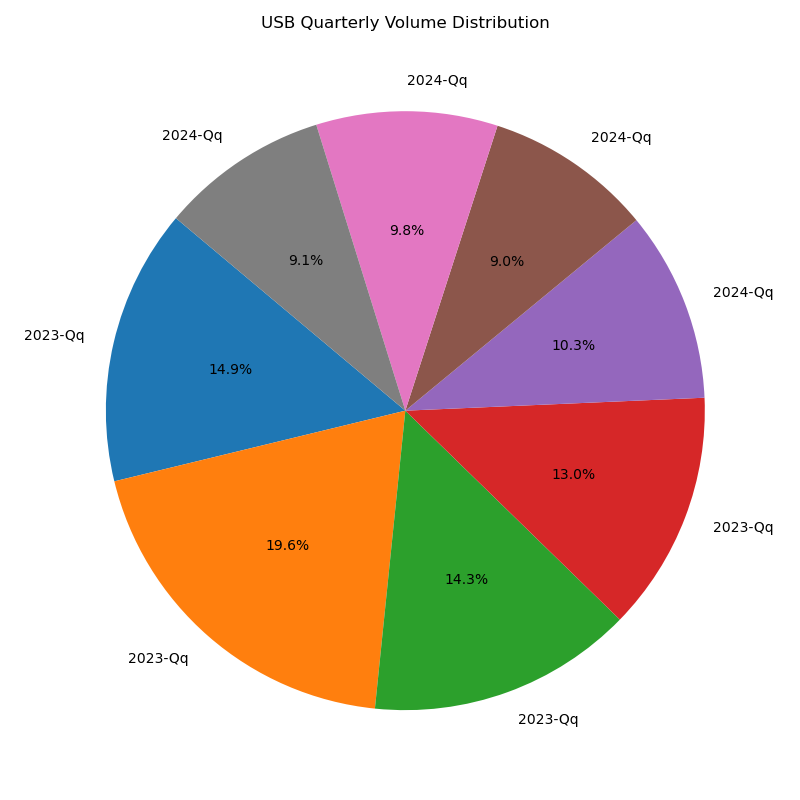


--- Document 2 (Score: 0.6183) ---
Summary: Here is a summary of the stock price chart:

The chart shows a declining trend in IPI's quarterly volume over time. The total volume starts at approximately $1.2 billion in Q1 2023 and decreases to around $0.5 billion in Q3 2024. The relationship between time (X-axis) and total volume (Y-axis) is inversely correlated, with each quarter showing a lower total volume. The largest decline occurs between Q1 2023 and Q3 2024, with a decrease of about $0.7 billion. Overall, the chart indicates a steady downward trend in IPI's quarterly volume.


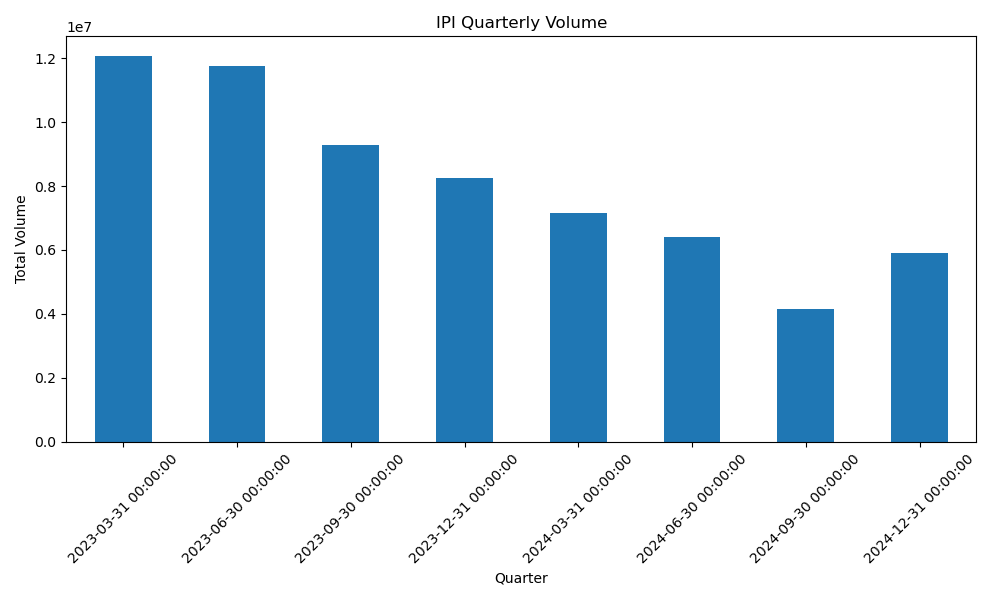


--- Document 3 (Score: 0.6114) ---
Summary: The provided image is a pie chart, not a stock price chart. However, I can still analyze the data and provide insights.

**Analysis:**

The pie chart shows the quarterly volume distribution of DE from 2023-Qq to 2024-Qq. The chart is divided into 8 sections, each representing a quarter.

**Key Trends:**

* The largest volume distribution is in 2023-Qq with 15.0%.
* The smallest volume distribution is in 2024-Qq with 9.8%.
* The volume distribution shows a general downward trend from 2023-Qq to 2024-Qq.

**Relationship between X (time) and Y (volume distribution):**

* As time progresses from 2023-Qq to 2024-Qq, the volume distribution decreases.

**Summary :**
The pie chart shows the quarterly volume distribution of DE from 2023-Qq to 2024-Qq. The largest volume distribution is 15.0% in 2023-Qq, while the smallest is 9.8% in 2024-Qq. The volume distribution generally decreases over time. The data suggests a downward trend in volume distribut

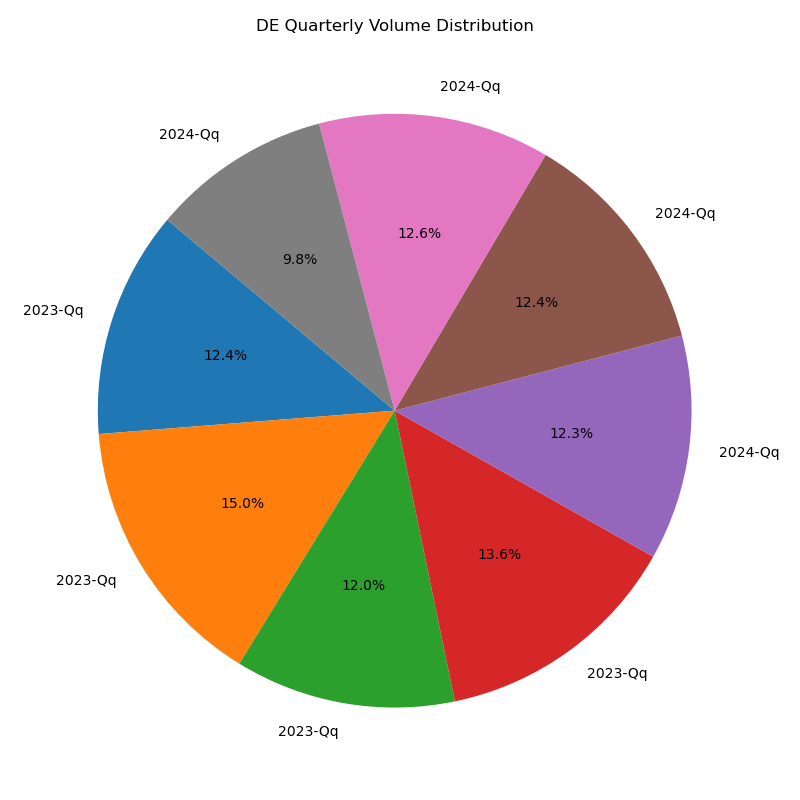


---  Text Query LLM Answer ---
Based on the provided summaries, the charts for **USB**, **IPI**, and **DE** all exhibit declining trends in volume or volume distribution over time. While the summaries specifically mention "volume" rather than "revenue," a declining volume trend is a key indicator often associated with potential declining revenue.
Retrieved Documents:

--- Document 1 (Score: 1.0000) ---
Summary: The AAPL stock price chart shows an overall upward trend from January 2023 to January 2025. The stock price started at around $120 and increased to approximately $260, with some fluctuations. From January 2023 to July 2023, the stock price rose steadily, followed by a period of volatility from July 2023 to April 2024. The stock price then surged significantly from April 2024 to January 2025. Overall, the relationship between time (X) and stock price (Y) is generally positive, indicating a long-term increase in stock value.


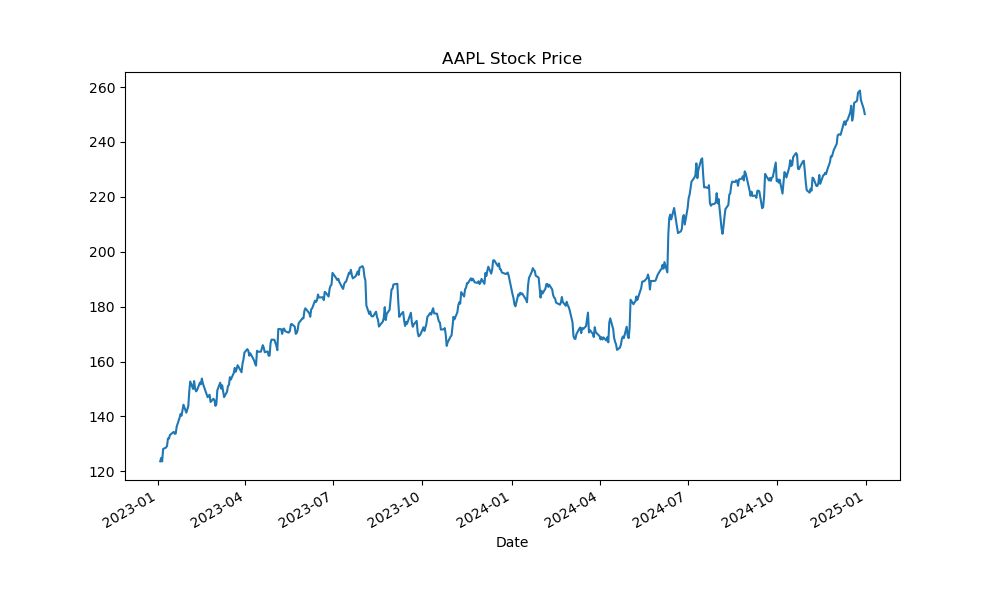


--- Document 2 (Score: 0.9815) ---
Summary: The AAPL stock price chart shows an overall upward trend from January 2023 to January 2025. The stock price started at around $120 and increased to a high of $258.74, with some fluctuations. The relationship between time (X) and stock price (Y) indicates a general increase in stock price over time, with periods of volatility. The average stock price was $188.89. The stock price experienced a significant surge in late 2024 and early 2025.


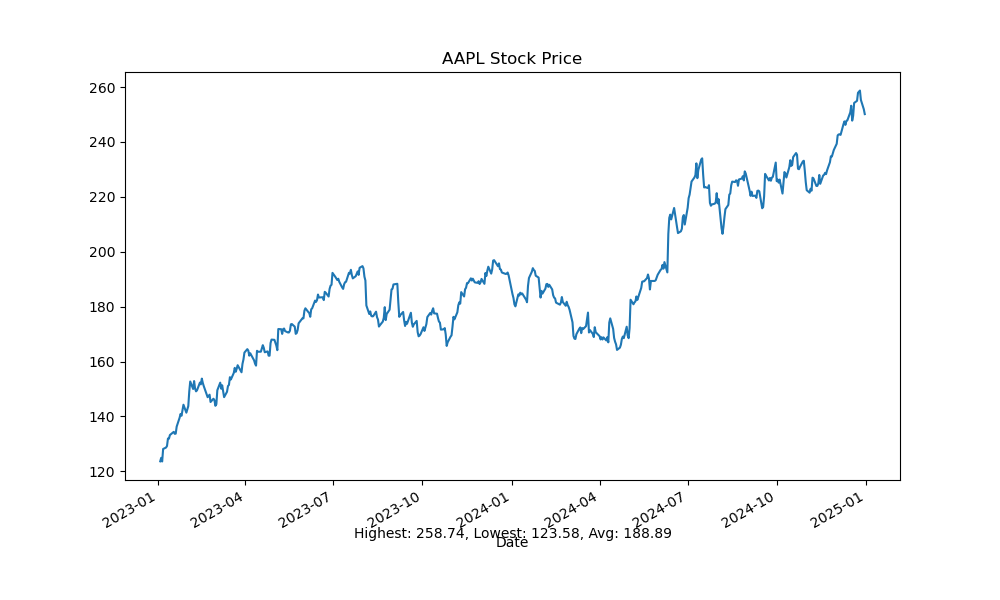


--- Document 3 (Score: 0.9723) ---
Summary: Here is a summary of the stock price chart:

The AON stock price chart shows a generally upward trend from January 2023 to January 2025. The stock price fluctuates between $280 and $310 from January 2023 to mid-2024, with no clear direction. However, from mid-2024 onwards, the stock price exhibits a significant and steady increase, reaching a peak of around $400 in late 2024. The relationship between time (X) and stock price (Y) is positive, with a notable acceleration in price growth from mid-2024 to January 2025. Overall, the chart suggests a strong upward momentum in the stock price over the past year.


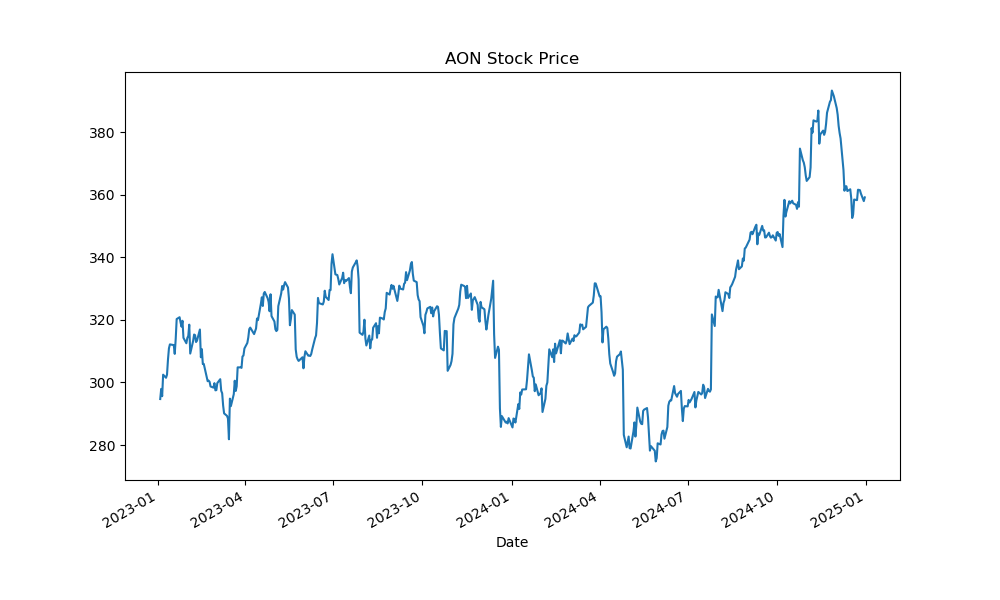


---  Image Query LLM Answer ---
The AAPL stock price chart reveals a strong overall upward trend from January 2023 to January 2025, with the price increasing from approximately $120 to a high of $258.74. The period saw an initial steady rise (Jan-Jul 2023), followed by volatility (Jul 2023-Apr 2024), and then a significant surge from April 2024 to January 2025. This indicates a generally positive long-term relationship between time and stock value, with an average price of $188.89 over the period.


In [16]:
from qdrant_client import QdrantClient
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import display, Image as IPyImage # Import IPyImage
from PIL import Image # Import PIL Image

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    google_api_key="*****************", #https://aistudio.google.com/app/api-keys Replace with valid Key
    temperature=0
)




# -------------------------
# Unified RAG function
# -------------------------
def rag_query(user_input: str = None, image_path: str = None, top_k: int = 3):
    """
    If `user_input` is provided → text search.
    If `image_path` is provided → image search.
    Both return a Gemini-generated final answer and display retrieved images if applicable.
    """
    # 1. Build embedding
    if user_input:  # text query
        q_emb = get_text_embedding(user_input)
        field = "text_vec"
        query = user_input
    elif image_path:  # image query
        q_emb = get_image_embedding(image_path)
        field = "image_vec"
        query = f"Describe the insights from this chart: {image_path}"
    else:
        raise ValueError("Provide either `user_input` (text) or `image_path` (image).")

    # 2. Retrieve from Qdrant
    results = client.query_points(
        collection_name="financial_charts",
        query=q_emb,
        using=field,
        limit=top_k
    )

    # 3. Display retrieved images and summaries
    print("Retrieved Documents:")
    for i, r in enumerate(results.points):
        print(f"\n--- Document {i+1} (Score: {r.score:.4f}) ---")
        print("Summary:", r.payload.get("summary", "No summary available"))
        image_path_retrieved = r.payload.get("image_path")
        if image_path_retrieved and os.path.exists(image_path_retrieved):
            try:
                display(IPyImage(filename=image_path_retrieved))
            except Exception as e:
                print(f" Could not display image {image_path_retrieved}: {e}")
        elif image_path_retrieved:
             print(f" Image not found locally: {image_path_retrieved}")


    # 4. Build context for LLM
    retrieved_context = "\n\n".join(
        [r.payload.get("summary", "") for r in results.points]
    )


    # 5. Build prompt for Gemini
    prompt = f"""
You are a financial analysis assistant.

Question:
{query}

Context (from retrieved financial chart summaries):
{retrieved_context}

Answer the question concisely, combining the context into your reasoning.
"""

    # 6. Call Gemini Flash
    response = llm.invoke(prompt)
    return response.content

# -------------------------
# Usage Examples
# -------------------------

# Text query example
answer_text = rag_query(user_input="charts with declining revenue trends")
print("\n---  Text Query LLM Answer ---")
print(answer_text)

# Image query example
answer_img = rag_query(image_path="/content/Financial360_dataset/financial_charts-dataset/AAPL_stock_price.png")
print("\n---  Image Query LLM Answer ---")
print(answer_img)

The output of below code is showing  the top 3 images (by their file paths) whose associated summaries are most similar in meaning to the  query "charts with declining revenue trends".

 Text Query Results:

--- Result (Score: 0.6242) ---
Image Path: /content/Financial360_dataset/financial_charts-dataset/USB_volume_pie.png
Summary: The provided image is a pie chart, not a stock price chart. However, I can still analyze the data and provide insights.
 ...


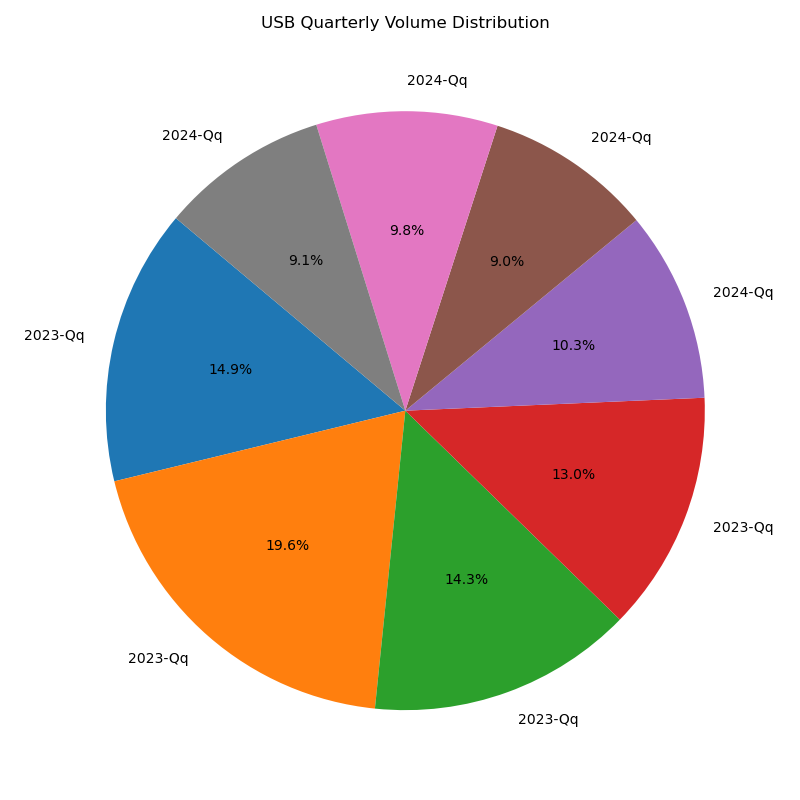


--- Result (Score: 0.6183) ---
Image Path: /content/Financial360_dataset/financial_charts-dataset/IPI_volume_bar.png
Summary: Here is a summary of the stock price chart:

The chart shows a declining trend in IPI's quarterly volume over time. The  ...


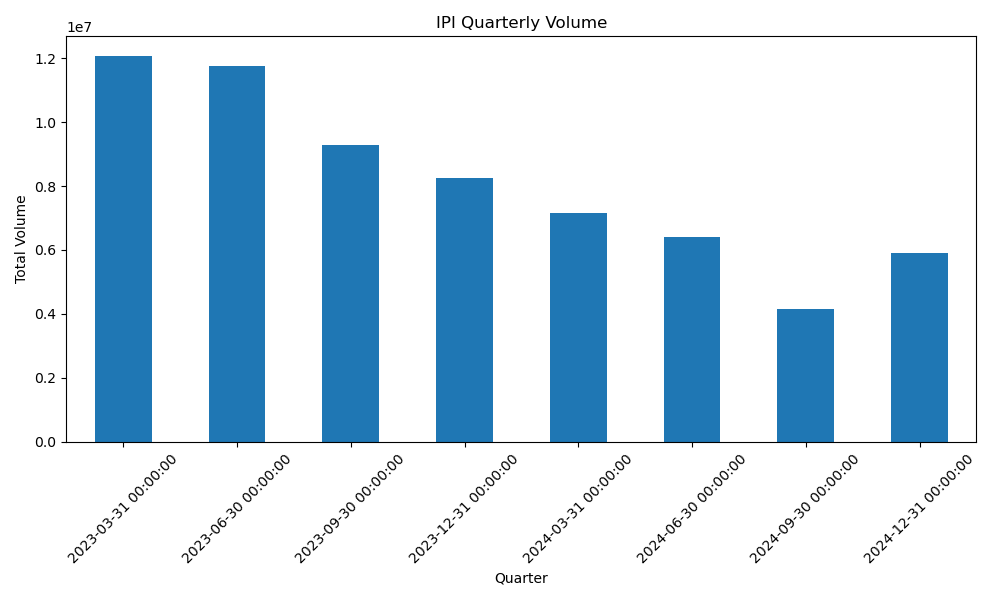


--- Result (Score: 0.6114) ---
Image Path: /content/Financial360_dataset/financial_charts-dataset/DE_volume_pie.png
Summary: The provided image is a pie chart, not a stock price chart. However, I can still analyze the data and provide insights.
 ...


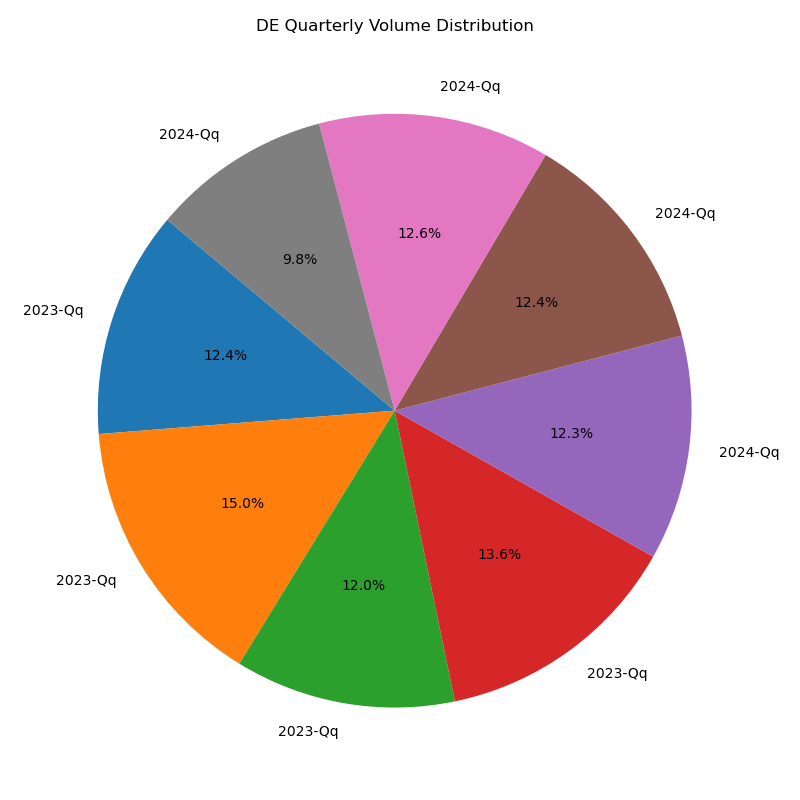

In [17]:
from PIL import Image
import numpy as np
import os
from IPython.display import display, Image # Import Image for displaying

q_emb = get_text_embedding("charts with declining revenue trends")

results = client.query_points(
    collection_name="financial_charts",
    query=q_emb,
    using="text_vec",
    limit=3
)

print(" Text Query Results:")
for r in results.points:
    print(f"\n--- Result (Score: {r.score:.4f}) ---")
    print("Image Path:", r.payload["image_path"])
    print("Summary:", r.payload["summary"][:120], "...")

    # Display image
    image_path_retrieved = r.payload.get("image_path")
    if image_path_retrieved and os.path.exists(image_path_retrieved):
        try:
            display(Image(filename=image_path_retrieved))
        except Exception as e:
            print(f" Could not display image {image_path_retrieved}: {e}")
    elif image_path_retrieved:
         print(f" Image not found locally: {image_path_retrieved}")

In [18]:
!git pull origin main

remote: Enumerating objects: 2064, done.
remote: Counting objects: 100% (2064/2064), done.
remote: Compressing objects: 100% (2058/2058), done.
remote: Total 2062 (delta 4), reused 2062 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (2062/2062), 936.38 KiB | 8.59 MiB/s, done.
Resolving deltas: 100% (4/4), completed with 2 local objects.
From https://github.com/M22AIE243/Financial360_dataset
 * branch            main       -> FETCH_HEAD
   3be67b0..7e403d2  main       -> origin/main
Updating 3be67b0..7e403d2
Fast-forward
 .DS_Store                                          |  Bin 6148 -> 6148 bytes
 MTP2_M22AIE243_VISION_model_final.ipynb            | 1191 ++++++++++++++++++++
 RAG_model_summary/AAPL_stock_price_summary.txt     |    1 +
 RAG_model_summary/AA_stock_price_summary.txt       |    1 +
 RAG_model_summary/AA_volume_bar_summary.txt        |    1 +
 RAG_model_summary/ABT_stock_price_summary.txt      |    1 +
 .../ABT_stock_price_with_caption_summary.txt       |    1 +


In [20]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=8d262fe46be6e6b205c42d57be0a5c5e60a47765b939dbc6f8d90df5289f1835
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [21]:
import os
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer

In [23]:
# -------------------------------------------------
# Download required NLTK resources
# -------------------------------------------------
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("punkt_tab")

# -------------------------------------------------
#  folders
# -------------------------------------------------
ground_truth_dir = "/content/Financial360_dataset/financial_charts-dataset"
generated_dir = "/content/Financial360_dataset/predictions_gemini_custom_dataset"

# Filename mapping rules
mapping_rules = {
    "_price_summary.txt": "_price.txt",
    "_volume_bar_summary.txt": "_volume_bar.txt",
    "_volume_pie_summary.txt": "_volume_pie.txt"
}

# -------------------------------------------------
# Containers for BLEU
# -------------------------------------------------
refs_bleu = []
hyps_bleu = []

# Raw text for ROUGE / METEOR
all_refs = []
all_hyps = []

total_files = 0
matched_pairs = 0
skipped = 0

print("\n Scanning dataset...")

# -------------------------------------------------
# Process ground truth files
# -------------------------------------------------
for file in os.listdir(ground_truth_dir):
    if not file.endswith(".txt"):
        continue  # Skip images or other files

    total_files += 1
    ref_path = os.path.join(ground_truth_dir, file)

    # Determine the expected prediction filename
    pred_file = None
    for key, val in mapping_rules.items():
        if file.endswith(key):
            pred_file = file.replace(key, val)
            break

    if pred_file is None:
        skipped += 1
        continue

    hyp_path = os.path.join(generated_dir, pred_file)

    # if prediction missing, skip it
    if not os.path.exists(hyp_path):
        skipped += 1
        continue

    # Read reference text
    with open(ref_path, "r") as f:
        ref = f.read().strip()

    # Read generated text
    with open(hyp_path, "r") as f:
        hyp = f.read().strip()

    # Skip empty text files
    if not ref or not hyp:
        skipped += 1
        continue

    # BLEU tokenization
    ref_tokens = word_tokenize(ref.lower())
    hyp_tokens = word_tokenize(hyp.lower())

    if len(hyp_tokens) == 0:
        skipped += 1
        continue

    refs_bleu.append([ref_tokens])  # BLEU expects list of lists
    hyps_bleu.append(hyp_tokens)

    all_refs.append(ref)
    all_hyps.append(hyp)

    matched_pairs += 1


# -------------------------------------------------
# Summary
# -------------------------------------------------
print(f"\n Total ground truth files found: {total_files}")
print(f" Valid matched text pairs: {matched_pairs}")
print(f" Skipped files: {skipped}")

if matched_pairs == 0:
    print("\nNo valid text pairs found. Exiting.")
    raise SystemExit


# ================================================================
# 1️ BLEU Score
# ================================================================
smooth = SmoothingFunction().method4
bleu_score_val = corpus_bleu(refs_bleu, hyps_bleu, smoothing_function=smooth)

print(f"\n BLEU Corpus Score: {bleu_score_val:.4f}")


# ================================================================
# 2️ROUGE Scores
# ================================================================
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

rouge1_list, rouge2_list, rougeL_list = [], [], []

for ref, hyp in zip(all_refs, all_hyps):
    score = scorer.score(ref, hyp)
    rouge1_list.append(score['rouge1'].fmeasure)
    rouge2_list.append(score['rouge2'].fmeasure)
    rougeL_list.append(score['rougeL'].fmeasure)

print("\n ROUGE Scores (Corpus Average):")
print(f"ROUGE-1: {np.mean(rouge1_list):.4f}")
print(f"ROUGE-2: {np.mean(rouge2_list):.4f}")
print(f"ROUGE-L: {np.mean(rougeL_list):.4f}")


# ================================================================
# 3️METEOR Score
# ================================================================
meteor_vals = []

for r, h in zip(all_refs, all_hyps):
    ref_tok = word_tokenize(r.lower())
    hyp_tok = word_tokenize(h.lower())
    meteor_vals.append(meteor_score([ref_tok], hyp_tok))

print(f"\n METEOR Score (Corpus Avg): {np.mean(meteor_vals):.4f}\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



 Scanning dataset...

 Total ground truth files found: 1680
 Valid matched text pairs: 744
 Skipped files: 936

 BLEU Corpus Score: 0.0468

 ROUGE Scores (Corpus Average):
ROUGE-1: 0.4072
ROUGE-2: 0.1224
ROUGE-L: 0.2503

 METEOR Score (Corpus Avg): 0.2211



Calculating the summary using RAG model.

In [ ]:
import os
from qdrant_client import QdrantClient
from langchain_google_genai import ChatGoogleGenerativeAI

# -------------------------
# Gemini LLM
# -------------------------
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    google_api_key="*****************",  # replace with your actual key
    temperature=0
)


# -------------------------
# Unified RAG function
# -------------------------
def rag_query(user_input: str = None, image_path: str = None, top_k: int = 3):
    """
    If `user_input` is provided → text search.
    If `image_path` is provided → image search.
    """
    # 1. Embedding
    if user_input:
        q_emb = get_text_embedding(user_input)
        field = "text_vec"
    elif image_path:
        q_emb = get_image_embedding(image_path)
        field = "image_vec"
    else:
        raise ValueError("Provide either text or image input.")

    # 2. Retrieve from Qdrant
    results = client.query_points(
        collection_name="financial_charts",
        query=q_emb,
        using=field,
        limit=top_k
    )

    # 3. Context
    retrieved_context = "\n\n".join([r.payload["summary"] for r in results.points])

    # 4. Prompt
    if user_input:
        query = user_input
    else:
        query = f"Describe the insights from this chart: {image_path}"

    prompt = f"""
You are a financial data summarization assistant.

Write a summary of the chart using the retrieved context.
Your goal is to produce a *natural, professional* summary.

Follow these rules:

1. Reuse short phrases or wording patterns from the retrieved context when possible.
2. Stay factual—no invented interpretations.
3. Keep it concise, objective, and data-focused.
4. Ensure clarity and coherence.

--------------------
Question:
{query}

Retrieved context:
{retrieved_context}

--------------------
Write the final summary:
"""

    # 5. Call Gemini
    response = llm.invoke(prompt)
    return response.content


# ---------------------------------------------------------
# NEW FUNCTION → Run RAG for all JPG images & save summaries
# ---------------------------------------------------------
def generate_summaries_for_all_images(images_folder: str, output_folder: str):
    os.makedirs(output_folder, exist_ok=True)

    jpg_files = [f for f in os.listdir(images_folder) if f.lower().endswith(".jpg")]



    for img_file in jpg_files:
        img_path = os.path.join(images_folder, img_file)
        print(f"Processing: {img_file}")

        try:
            summary = rag_query(image_path=img_path)

            # Output filename → image_name_summary.txt
            base_name = os.path.splitext(img_file)[0]
            out_file = os.path.join(output_folder, f"{base_name}_summary.txt")

            with open(out_file, "w") as f:
                f.write(summary)



        except Exception as e:
            print(f"Error processing {img_file}: {e}")


# ---------------------------------------------------------
# RUN SCRIPT
# ---------------------------------------------------------
if __name__ == "__main__":

    images_folder = "/content/Financial360_dataset/financial_charts-dataset"
    output_folder = "/content/Financial360_dataset/RAG_model_summary"

    generate_summaries_for_all_images(images_folder, output_folder)




Below code compare the summarygenerated by RAG model with ground truth and  calculaute the BLUE/ROUGE / METEOR scores we see a lot of improvement  in result.

In [26]:


ground_truth_dir = "/content/Financial360_dataset/financial_charts-dataset"
generated_dir = "/content/Financial360_dataset/RAG_model_summary"


# Filename mapping rules
mapping_rules = {
    "_price_summary.txt": "_price_summary.txt",
    "_volume_bar_summary.txt": "_volume_bar_summary.txt",
    "_volume_pie_summary.txt": "_volume_pie_summary.txt"
}

# -------------------------------------------------
# Containers for BLEU
# -------------------------------------------------
refs_bleu = []
hyps_bleu = []

# Raw text for ROUGE / METEOR
all_refs = []
all_hyps = []

total_files = 0
matched_pairs = 0
skipped = 0

print("\n Scanning dataset...")

# -------------------------------------------------
# Process ground truth files
# -------------------------------------------------
for file in os.listdir(ground_truth_dir):
    if not file.endswith(".txt"):
        continue  # Skip images or other files

    total_files += 1
    ref_path = os.path.join(ground_truth_dir, file)

    # Determine the expected prediction filename
    pred_file = None
    for key, val in mapping_rules.items():
        if file.endswith(key):
            pred_file = file.replace(key, val)
            break

    if pred_file is None:
        skipped += 1
        continue

    hyp_path = os.path.join(generated_dir, pred_file)

    # if prediction missing, skip it
    if not os.path.exists(hyp_path):
        skipped += 1
        continue

    # Read reference text
    with open(ref_path, "r") as f:
        ref = f.read().strip()

    # Read generated text
    with open(hyp_path, "r") as f:
        hyp = f.read().strip()

    # Skip empty text files
    if not ref or not hyp:
        skipped += 1
        continue

    # BLEU tokenization
    ref_tokens = word_tokenize(ref.lower())
    hyp_tokens = word_tokenize(hyp.lower())

    if len(hyp_tokens) == 0:
        skipped += 1
        continue

    refs_bleu.append([ref_tokens])  # BLEU expects list of lists
    hyps_bleu.append(hyp_tokens)

    all_refs.append(ref)
    all_hyps.append(hyp)

    matched_pairs += 1


# -------------------------------------------------
# Summary
# -------------------------------------------------
print(f"\n Total ground truth files found: {total_files}")
print(f" Valid matched text pairs: {matched_pairs}")
print(f" Skipped files: {skipped}")

if matched_pairs == 0:
    print("\n No valid text pairs found. Exiting.")
    raise SystemExit


# ================================================================
# 1️ BLEU Score
# ================================================================
smooth = SmoothingFunction().method4
bleu_score_val = corpus_bleu(refs_bleu, hyps_bleu, smoothing_function=smooth)

print(f"\n BLEU Corpus Score: {bleu_score_val:.4f}")


# ================================================================
# 2️ROUGE Scores
# ================================================================
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

rouge1_list, rouge2_list, rougeL_list = [], [], []

for ref, hyp in zip(all_refs, all_hyps):
    score = scorer.score(ref, hyp)
    rouge1_list.append(score['rouge1'].fmeasure)
    rouge2_list.append(score['rouge2'].fmeasure)
    rougeL_list.append(score['rougeL'].fmeasure)

print("\n ROUGE Scores (Corpus Average):")
print(f"ROUGE-1: {np.mean(rouge1_list):.4f}")
print(f"ROUGE-2: {np.mean(rouge2_list):.4f}")
print(f"ROUGE-L: {np.mean(rougeL_list):.4f}")


# ================================================================
# 3️ METEOR Score
# ================================================================
meteor_vals = []

for r, h in zip(all_refs, all_hyps):
    ref_tok = word_tokenize(r.lower())
    hyp_tok = word_tokenize(h.lower())
    meteor_vals.append(meteor_score([ref_tok], hyp_tok))

print(f"\n METEOR Score (Corpus Avg): {np.mean(meteor_vals):.4f}\n")



 Scanning dataset...

 Total ground truth files found: 1680
 Valid matched text pairs: 393
 Skipped files: 1287

 BLEU Corpus Score: 0.2266

 ROUGE Scores (Corpus Average):
ROUGE-1: 0.6552
ROUGE-2: 0.5346
ROUGE-L: 0.5898

 METEOR Score (Corpus Avg): 0.4699



### Benefits of RAG-based Image Summarization

Using a Retrieval-Augmented Generation (RAG) approach for image summarization, as demonstrated in this notebook, offers several advantages compared to directly feeding images to a large language model for summarization:

*   **Faster Inference**: By pre-computing and storing image and text embeddings in a vector database (Qdrant), the RAG approach avoids the need to process the entire image and its associated text with the LLM for every query. The similarity search in the vector database is significantly faster, allowing for quicker retrieval of relevant information.
*   **Reduced Computational Cost**: Processing images with LLMs can be computationally expensive. RAG offloads the heavy lifting of initial image processing to the embedding models and the vector database, reducing the computational resources required for each query.
*   **Improved Relevance and Accuracy**: RAG retrieves information from a curated and relevant dataset (the financial charts and their captions in this case). This provides the LLM with specific, factual context to generate summaries, leading to more accurate and relevant results compared to relying solely on the LLM's general knowledge.
*   **Scalability**: Vector databases like Qdrant are designed to handle large volumes of data and perform efficient similarity searches. This makes the RAG approach more scalable for working with extensive datasets of images and text.
*   **Flexibility**: The RAG framework allows for easy updates and additions to the knowledge base (the vector database) without requiring retraining the entire LLM. You can simply add new image and text embeddings to the database.
*   **Grounding the LLM**: The retrieved relevant documents "ground" the LLM's response in specific data, reducing the likelihood of the LLM generatinghallucinations or inaccurate information.

* **Evaluated the RAG model's performance** using BLEU, ROUGE, and METEOR scores, showing significant improvements.